# Assignment 1: Street View {Group 18}
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build a model that recognizes the correct digit.

In [1]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import warnings
import time
import os
import copy

#sklearn specific imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import svm

In [3]:
# Download Streetview data. Takes a while the first time.
SVHN = oml.datasets.get_dataset(41081)
X, y, cats, attrs = SVHN.get_data(dataset_format='array',
target=SVHN.default_target_attribute)

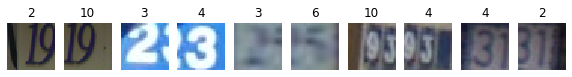

In [74]:
# Plots image. Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X), figsize=(10, 5))
    if grayscale:
        [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray')
    for n,ax in enumerate(axes)]
    else:
        [ax.imshow(X[n].reshape(32, 32, 3)/255) for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
plot_images(X[0:10], y[0:10]);

### Team details {Group 18}
Add the names of all team members and a short description of each member's contributions.   

- #### TEAM MEMBER 1 = Maury 

    Description of work: Exercise 1 & 2

- #### TEAM MEMBER 2 = Daan

    Description of work: Exercise 1 & 2

- #### TEAM MEMBER 3 = Massimo

    Description of work: Exercise 3 & 4

- #### TEAM MEMBER 4 = Dayana 

    Description of work: Exercise 6

- #### TEAM MEMBER 5 = Fabian

    Description of work: Exercise 5


## 1. Evaluate different models (15 points) {-}
- Take a stratified 10% subsample of the data. Plot the distribution of the classes (as a histogram) for both the original data and the subsample. 
- Evaluate k-Nearest Neighbors, Logistic Regression and Linear SVM on this sample, using their default hyperparameter settings. 
    - Use cross-validation with 3 folds, output the training accuracy and test accuracy including the standard deviations.
- Discuss the results. Are they what you expected? Are the model over/underfitting? What does the standard deviation tell you? Do you think you can get better results with more training data?

In [5]:
# 10% subsample.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.075, test_size=0.025, stratify=y, random_state=0)

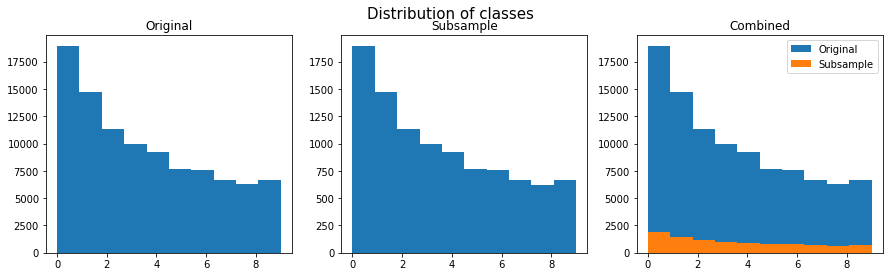

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = [15,4])
fig.suptitle('Distribution of classes', size = 15)
ax1, ax2, ax3 = axes.flatten()

ax1.hist(y)
ax1.set_title('Original')

ax2.hist(np.append(y_train,y_test))
ax2.set_title('Subsample')

ax3.hist(y, label = 'Original')
ax3.hist(np.append(y_train,y_test), label = 'Subsample')
ax3.legend(prop={'size': 10})
ax3.set_title('Combined')

plt.show()

In [ ]:
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

In [ ]:
print(np.unique(y_train))

## Here three functions are defined for different models that will be used ##

In [6]:
def knn(X_train, X_test, y_train, y_test):

    knn = KNeighborsClassifier().fit(X_train, y_train)
    knntrainacc = knn.score(X_train, y_train)
    knntestacc = knn.score(X_test, y_test)
    knncv = cross_val_score(knn, np.concatenate((X_train, X_test)), np.append(y_train,y_test), cv=3)

    print("KNN evaluation\n")
    print("Training accuracy: {}%".format(round(knntrainacc*100,1)))
    print("Test accuracy: {}%".format(round(knntestacc*100,1)))
    print("3-folds cross-validation score: {} (+/- {})%".format(round(knncv.mean()*100,1), round((knncv.std()*100*2),1)))
    
    return knncv.mean()

In [70]:
knn(X_train, X_test, y_train, y_test);

KNN evaluation

Training accuracy: 56.9%
Test accuracy: 36.0%
3-folds cross-validation score: 35.7 (+/- 0.8)%


In [7]:
def logreg(X_train, X_test, y_train, y_test):

    logreg = LogisticRegression().fit(X_train, y_train)
    logregtrainacc = logreg.score(X_train, y_train)
    logregtestacc = logreg.score(X_test, y_test)
    logregcv = cross_val_score(logreg, np.concatenate((X_train, X_test)), np.append(y_train,y_test), cv=3)

    print("Logistic regression evaluation\n")
    print("Training accuracy: {}%".format(round(logregtrainacc*100,1)))
    print("Test accuracy: {}%".format(round(logregtestacc*100,1)))
    print("3-folds cross-validation score: {} (+/- {})%".format(round(logregcv.mean()*100,1), round((logregcv.std()*100*2),1)))
    
    return logregcv.mean()

In [48]:
logreg(X_train, X_test, y_train, y_test);

Logistic regression evaluation

Training accuracy: 70.9%
Test accuracy: 16.1%
3-folds cross-validation score: 16.6 (+/- 0.8)%


In [8]:
def lsvm(X_train, X_test, y_train, y_test):

    lsvm = LinearSVC().fit(X_train, y_train)
    lsvmtrainacc = lsvm.score(X_train, y_train)
    lsvmtestacc = lsvm.score(X_test, y_test)
    lsvmcv = cross_val_score(lsvm, np.concatenate((X_train, X_test)), np.append(y_train,y_test), cv=3)

    print("Linear support vector machine evaluation\n")
    print("Training accuracy: {}%".format(round(lsvmtrainacc*100,1)))
    print("Test accuracy: {}%".format(round(lsvmtestacc*100,1)))
    print("3-folds cross-validation score: {} (+/- {})%".format(round(lsvmcv.mean()*100,1), round((lsvmcv.std()*100*2),1)))
    
    return lsvmcv.mean()

In [50]:
lsvm(X_train, X_test, y_train, y_test);

Linear support vector machine evaluation

Training accuracy: 39.0%
Test accuracy: 15.8%
3-folds cross-validation score: 16.2 (+/- 2.6)%


### Discussion

As expected the performance of $k$-Nearest Neighbors is pretty bad. This model suffers from the "curse of dimensionality". This means that for any two points, their Euclidean distance becomes the same as the number of dimensions increase. The training accuracy is not good and the model seems to underfit. The testing accuracy is terrible. 
The logic regression model is heavily overfitting. It has a high training accuracy while the testing accuracy is very low. 
The SVM model has descent training accuracy but also low testing accuracy. 

We have trained the models with more data as well, this does not significantly improve the performance of models (possibly add numbers if computationally feasible). As we have a small dataset we expect to have a high variance if the model is overfitting, because the score of the model might depend on the dataset. This high variance is reflected in high standard deviation in the results of the cross-validation since they signal us that the model is unstable and produce significantly different score with a different dataset. 
The cross-validation scores have a low standard deviation. This means that the 3 fold used in training are very similar. These standard deviations improve as more data is used for training. As of now, we expect that all models can perform better using more data.

## 2. Learning curves (20 points) {-}
- Start with a 1% stratified subsample of the original data. Train all 3 classifiers and record both the accuracy (same as above) and the [training time](https://pythonhow.com/measure-execution-time-python-code/).  
- Repeatedly **add** 1% more statified data (don't take a completely new 2% subsample). Measure accuracy and training time again.
- Continue to at least 10% of the original data. Plot the results as a line graph, with training set size on the x-axis and accuracy and training time, respectively, on the y-axes.
    - If the algorithms are sufficiently fast, you can continue to 100% as well.
- Discuss your results. Which algorithms are fast/slow? Which require more data to get better results? Which ones tend to overfit? Which ones would benefit from more data?

In [212]:
#variables here are only so that X and y remain "the whole dataset"
xt = X#[:5000,:]
yt = y#[:5000]
print(xt.shape, yt.shape)

(99289, 3072) (99289,)


In [214]:
init_start = time.time();

#Adjust this if you want more bigger percent of sample
max_percentage = 11;

#This is needed later on for plotting
knncvs, logregcvs, lsvmcvs, knntime, logregtime, lsvmtime = [],[],[],[],[],[]

print('-' * 102)
print('KNN'.center(width))
print('-' * 102)
print('Subsample(%) \tTraining Accuracy \tTesting Accuracy \tKfold mean \tSamples \tTime')

for i in range(1,max_percentage):
    X_train, X_test, y_train, y_test = train_test_split(xt, yt, train_size=0.75*(i/100), test_size=0.25*(i/100), random_state=0)
    
    start = time.time()
    model = KNeighborsClassifier().fit(X_train, y_train)
    end = time.time()
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    cv_score = cross_val_score(model, np.concatenate((X_train, X_test)), np.append(y_train,y_test), cv=3)
    knncvs.append(cv_score.mean())
    knntime.append(end-start)
    print('%d \t\t%.4f \t\t\t%.4f \t\t\t%.4f \t\t%d \t\t%.4f ' % (i, train_score, test_score, cv_score.mean(), X_train.shape[0], (end-start)))

print('\n')
print('-' * 102)
print('Logistic regression'.center(width))
print('-' * 102)
print('Subsample(%) \tTraining Accuracy \tTesting Accuracy \tKfold mean \tSamples \tTime')    

for i in range(1,max_percentage):
    X_train, X_test, y_train, y_test = train_test_split(xt, yt, train_size=0.75*(i/100), test_size=0.25*(i/100), random_state=0)
    
    start = time.time()
    model = LogisticRegression().fit(X_train, y_train)
    end = time.time()
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    cv_score = cross_val_score(model, np.concatenate((X_train, X_test)), np.append(y_train,y_test), cv=3)
    logregcvs.append(cv_score.mean())
    logregtime.append(end-start)
    print('%d \t\t%.4f \t\t\t%.4f \t\t\t%.4f \t\t%d \t\t%.4f ' % (i, train_score, test_score, cv_score.mean(), X_train.shape[0], (end-start)))

print('\n')
print('-' * 102)
print('Support Vector Machine'.center(width))
print('-' * 102)
print('Subsample(%) \tTraining Accuracy \tTesting Accuracy \tKfold mean \tSamples \tTime')

for i in range(1,max_percentage):
    X_train, X_test, y_train, y_test = train_test_split(xt, yt, train_size=0.75*(i/100), test_size=0.25*(i/100), random_state=0)
    
    start = time.time()
    model = LinearSVC().fit(X_train, y_train)
    end = time.time()
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    cv_score = cross_val_score(model, np.concatenate((X_train, X_test)), np.append(y_train,y_test), cv=3)
    lsvmcvs.append(cv_score.mean())
    lsvmtime.append(end-start)
    print('%d \t\t%.4f \t\t\t%.4f \t\t\t%.4f \t\t%d \t\t%.4f ' % (i, train_score, test_score, cv_score.mean(), X_train.shape[0], (end-start)))

final = time.time();
minute = (final-init_start)/60
sec = (final-init_start)%60
print('\n')
print('Total running time: %d min %d s' % (minute, sec))
print(len(knntime), len(logregcvs), len(lsvmcvs), len(knntime), len(logregtime), len(lsvmtime))

------------------------------------------------------------------------------------------------------
                                                          KNN                                                           
------------------------------------------------------------------------------------------------------
Subsample(%) 	Training Accuracy 	Testing Accuracy 	Kfold mean 	Samples 	Time
1 		0.4704 			0.2289 			0.2467 		744 		0.0928 
2 		0.4963 			0.2777 			0.2648 		1489 		0.2510 
3 		0.5045 			0.3020 			0.2910 		2234 		0.4374 
4 		0.5218 			0.3072 			0.2969 		2978 		0.6092 
5 		0.5294 			0.3333 			0.3062 		3723 		0.8149 
6 		0.5336 			0.3389 			0.3226 		4468 		1.3267 
7 		0.5474 			0.3521 			0.3332 		5212 		1.3007 
8 		0.5496 			0.3333 			0.3339 		5957 		1.5244 
9 		0.5583 			0.3351 			0.3425 		6702 		1.7703 
10 		0.5650 			0.3464 			0.3422 		7446 		2.1891 


------------------------------------------------------------------------------------------------------
           

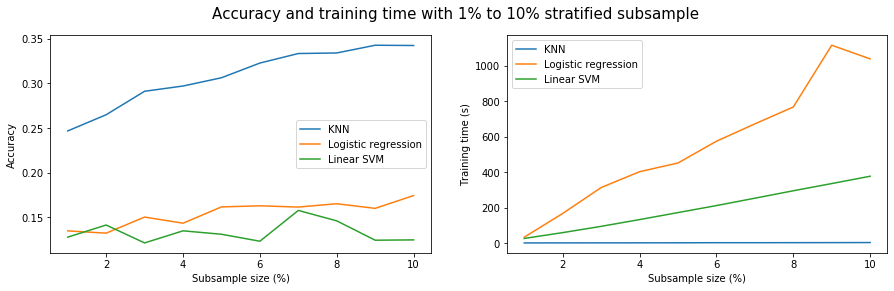

In [216]:
subsamplesize = list(range(1,max_percentage))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = [15,4])
fig.suptitle('Accuracy and training time with 1% to 10% stratified subsample', size = 15)
ax1, ax2 = axes.flatten()

ax1.plot(subsamplesize, knncvs, label = "KNN")
ax1.plot(subsamplesize, logregcvs, label = "Logistic regression")
ax1.plot(subsamplesize, lsvmcvs, label = "Linear SVM")
ax1.legend(prop={'size': 10})
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Subsample size (%)')

ax2.plot(subsamplesize, knntime, label = "KNN")
ax2.plot(subsamplesize, logregtime, label = "Logistic regression")
ax2.plot(subsamplesize, lsvmtime, label = "Linear SVM")
ax2.legend(prop={'size': 10})
ax2.set_ylabel('Training time (s)')
ax2.set_xlabel('Subsample size (%)')

plt.show()

### Discussion

In general, all 3 algorithms tend to perform better as the sample size increases. Both training and testing accuracy improve as well as the $cros\_validated$ performance. 
The kk-Nearest Neighbours model thrives under the addition of data in particular, as can be seen from the rising line in the left plot above. 
The linear SVM model and logistic regression model also see improved performance to a lesser extent as data increases. Also, they are computationally more expensive.

Logistic regression: 
With the subsample of size 1% and 2%, the number of raws in the dataset is less than the number of columns. Therefore, we have a wide and short matrix (A) with rank (r) = number of raws. Thus, we need only r columns to span the space in $R^{r}$. This means that with r columns we can obtain any vector in the space $R^{r}$, included the vector containing the class in our dataset (b). Thus, we have always a solution for solving Ax = b (where A is the matrix of the dataset, x the vector of parameters, b the class to predict) without the need of projecting x into the column space for getting the closest solution. However, in the test set, this set x of parameters give a very bad prediction. It is extremely overfitting for small subsample sizes. Overfitting becomes less of a problem as the subsample size increases because we are adding more information and we find the closest solution to a longer matrix.

SVM overfits for a 1% subsample but the training accuracy steeply drops as the subsample size increases. 
$k$-Nearast Neighbours is underfitting but seems to perform the best ultimately as the subsample size is increased to 10%.

$k$-Nearast Neighbours is the fastest of the three test models. The training time of both k$k$-Nearast Neighbours and linear SVM appear to increase linearly with increasing data whereas the Logistic Regression model seems to follow a polynomial trend.


**Technical remark**: 
- The times indicated in the figures and graph above are only the times that are needed to train an algorithm.
- In order to see whether the models overfit we look at their training and test accuracy.

## 3. Data representation (20 points) {-}
* Convert the images to grayscale (use the function below). Check whether the conversion is correct by plotting a few of the converted images.
    * Is the grayscale representation better than the color representation? Does it yield better models? Why (not)? Run the necessary experiments and discuss. For instance, compare the performance of models trained on both representations.
* Afterwards, normalize the data by substracting the mean of the pixel values from every image and dividing by the standard deviation of very image. 
    * Note: Do this for every image independently. Don't compute means or standard deviations over the entire training/test set
    * Again, check whether you have done it correctly by plotting some of the converted images.
    * Is the new representation better? Why (not)? Run the necessary experiments and discuss.
* Finally, run [PCA (Principal Component Analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data and see if that gives you a better (lower-dimensional) representation. Note that you need to use a pipeline here to avoid data leakage between your training and test set (see Tutorial 3).
    * Try different numbers of components or use a solver to guess the optimal number of components
    * Is the new representation better? Why (not)? Run the necessary experiments and discuss.
    
**Technical remark**:
- Judging by the numbers, the conversion from RGB to grayscale is done using the weighted luminosity method (see: https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm)

In [9]:
# Converts an RGB encoded image to a grayscale image
def rgb2gray(X, dim=32):
    return np.expand_dims(np.dot(X.reshape(len(X), dim*dim, 3), [0.2990, 0.5870, 0.1140]), axis=3)

In [10]:
X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

In [69]:
nsamples_train, nx_train, ny_train = X_train_gray.shape
nsamples_test, nx_test, ny_test = X_test_gray.shape

#Convert the dataset into 2 dimensional array 
X_train_gray_2_dim = X_train_gray.reshape((nsamples_train,nx_train*ny_train))
X_test_gray_2_dim = X_test_gray.reshape((nsamples_test,nx_test*ny_test))

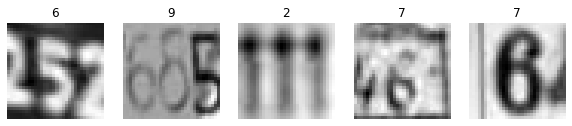

In [20]:
plot_images(X_train_gray[0:5], y_train[0:5],grayscale = True);

### Fitting models to the grayscale images ##

In [31]:
knn(X_train_gray_2_dim, X_test_gray_2_dim, y_train, y_test)

KNN evaluation

Training accuracy: 59.1%
Test accuracy: 38.2%
3-folds cross-validation score: 38.2 (+/- 0.8)%


0.38170823915282437

In [32]:
logreg(X_train_gray_2_dim, X_test_gray_2_dim, y_train, y_test);

Logistic regression evaluation

Training accuracy: 48.5%
Test accuracy: 15.5%
3-folds cross-validation score: 16.5 (+/- 0.4)%


In [33]:
lsvm(X_train_gray_2_dim, X_test_gray_2_dim, y_train, y_test);

Linear support vector machine evaluation

Training accuracy: 18.8%
Test accuracy: 12.2%
3-folds cross-validation score: 12.9 (+/- 9.8)%


### Discussion ##


Only KNN slightly improve its performance (roughly 2%), whereas logistic regression and SVM drastically decrease. However, theoretically, we should see an increase in performance in every model because transforming the images into a grayscale reduces the dimensionality. Due to the curse of dimensionality, having fewer features increases the probability of finding patterns in the data. 
However, without normalizing the data they do not yield better results with grey images. Thus, we suppose that after the conversion into grayscale the difference in the absolute values among features increases and is the cause of decreasing in performance.


### Normalizing ##

In [12]:
X_train_gray_normalized = copy.deepcopy(X_train_gray_2_dim)
X_test_gray_normalized = copy.deepcopy(X_test_gray_2_dim)

def normalize(X, X_original):
    for row in range(X.shape[0]):
        for column in range(len(X[row,:])):
            X[row,column] = (X[row,column]-X_original[row].mean())/X_original[row].std()

#Normalizing the gray images
normalize(X_test_gray_normalized, X_train_gray_2_dim);
normalize(X_train_gray_normalized, X_train_gray_2_dim);

In [204]:
#Normalizing the color images
X_train_normalized = copy.deepcopy(X_train)
X_test_normalized = copy.deepcopy(X_test)

normalize(X_test_normalized, X_test);
normalize(X_train_normalized, X_train);

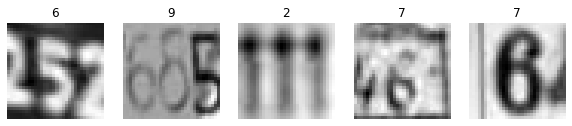

In [75]:
#Plotting to see wheter the normalization was correct
plot_images(X_train_gray_normalized[0:5], y_train[0:5],grayscale = True);

In [76]:
X_train_gray_normalized[1,1:5], X_train_gray_2_dim[1,1:5]

(array([0.63437475, 0.68134594, 0.71533586, 0.7198558 ]),
 array([144.847, 146.146, 147.086, 147.211]))

### Fitting models to normalized grayscale images and to normalized color images ##

In [27]:
#KNN evaluation with grey scaled images
knn(X_train_gray_normalized, X_test_gray_normalized, y_train, y_test);

KNN evaluation

Training accuracy: 71.2%
Test accuracy: 54.0%
3-folds cross-validation score: 51.8 (+/- 2.9)%


In [28]:
#KNN evaluation with color scaled images
knn(X_train_normalized, X_test_normalized, y_train, y_test);

KNN evaluation

Training accuracy: 63.3%
Test accuracy: 46.1%
3-folds cross-validation score: 45.7 (+/- 0.5)%


In [14]:
#Logistic Regression with scaled gray images
print('Logistic regression evaluation with gray scale images')
logreg(X_train_gray_normalized, X_test_gray_normalized, y_train, y_test);



Logistic regression evaluation with gray scale images
Logistic regression evaluation

Training accuracy: 44.4%
Test accuracy: 18.3%
3-folds cross-validation score: 19.4 (+/- 0.3)%


In [15]:
#Logistic Regression with scaled color images
print('Logistic regression with color scaled images')
logreg(X_train_normalized, X_test_normalized, y_train, y_test);


Logistic regression with color scaled images
Logistic regression evaluation

Training accuracy: 99.1%
Test accuracy: 13.8%
3-folds cross-validation score: 14.4 (+/- 0.0)%


In [17]:
#Suppert vector machine with scaled gray images
lsvm(X_train_gray_normalized, X_test_gray_normalized, y_train, y_test);



Linear support vector machine evaluation

Training accuracy: 33.5%
Test accuracy: 14.7%
3-folds cross-validation score: 14.5 (+/- 2.1)%


In [16]:
#Support vector machine with scaled color images
lsvm(X_train_normalized, X_test_normalized, y_train, y_test);

Linear support vector machine evaluation

Training accuracy: 99.8%
Test accuracy: 13.3%
3-folds cross-validation score: 13.9 (+/- 1.1)%


### Discussion ##
After scaling the pixels the models yield better performance for every model we used. With KNN the accuracy significantly increases (about 20% from the evaluation with the original data), while with logistic regression and SVM slightly improves. 
Probably, some pixel were consistently greater in absolute value than others, so they were taken as more relevant by the model. Scaling reduces the difference in the pixels' values, ranging them in a smaller interval.

### Principal component analysis ##

In [26]:
pipe_svm = Pipeline([("pca", PCA(n_components = 'mle')), ("svm",LinearSVC())])

pipe_svm.fit(X_train_gray_normalized, y_train)
print("Test score: {:.2f}".format(pipe_svm.score(X_test_gray_normalized, y_test)))
print("Train score: {:.2f}".format(pipe_svm.score(X_train_gray_normalized, y_train)))



Test score: 0.16
Train score: 0.34


In [27]:
pipe_logreg = Pipeline([("pca", PCA(n_components = 'mle')), ('logisticreg',LogisticRegression())])

pipe_logreg.fit(X_train_gray_normalized, y_train)
print("Test score: {:.2f}".format(pipe_logreg.score(X_test_gray_normalized, y_test)))
print("Train score: {:.2f}".format(pipe_logreg.score(X_train_gray_normalized, y_train)))

Test score: 0.18
Train score: 0.44


In [28]:
pipe_knn = Pipeline([("pca", PCA(n_components = 'mle')), ('knn',KNeighborsClassifier())])

pipe_knn.fit(X_train_gray_normalized, y_train)
print("Test score: {:.2f}".format(pipe_knn.score(X_test_gray_normalized, y_test)))
print("Train score: {:.2f}".format(pipe_knn.score(X_train_gray_normalized, y_train)))

Test score: 0.54
Train score: 0.71


After applying principal component analysis every model performe roughly the same as without applying it. We think in this case the models do not benefit from the dimensionality reduction because the lack of information projecting the features. In this case, the dimensionality reduction does not help the accuracy.

## 4. Regularization (20 points) {-}
- Tune the algorithm's main regularization hyperparameter on the 10% stratified subsample using the normalized grayscale representation. These are the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. 
- We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. C should be varied logarithmically, n_neighbors linearly. 
- Run a grid search over these ranges, using 3-fold cross-valdation, and plot both the training and test error. Start with a coarse grid (e.g. 5 values per hyperparameter), use a finer grid for the 'interesting' regions (where performance changes) if training time allows.
- Plot the effect of every one of the hyperparameters (both the training and test score). Discuss the plots. For which values is the model over/underfitting? Is there a sweet spot?
- Evaluate the optimized models (the best hyperparameter settings) on the rest of the (unseen) data and discuss your findings. Do the results generalize? If not, what can/ should you do? Discuss. Run additional experiments if it helps you confirm your claims.

In [ ]:
# manual grid search cv for svm
all_scores_train = []
all_scores = []
best_score = 0
error_svm = []
parameters_svm = [0.0000000001, 0.00000001,0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for C in parameters_svm:
    # for each combination of parameters
    # train an SVC
    svm = LinearSVC(C=C)
    # perform cross-validation
    scores = cross_val_score(svm, X_train_gray_normalized, y_train, cv=3)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    svm.fit(X_train_gray_normalized, y_train);
    all_scores.append(score)
    all_scores_train.append(svm.score(X_train_gray_normalized, y_train))
    pred_i = svm.predict(X_test_gray_normalized)
    error_svm.append(np.mean(pred_i != y_test))

    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}  
# rebuild a model on the combined training and validation set
svm = LinearSVC(**best_parameters)
svm.fit(X_train_gray_normalized, y_train)

In [231]:
print("The test score of svm after regularization is {}".format(svm.score(X_test_gray_normalized, y_test)))
print("The best C parameter is {}".format(best_parameters['C']))


The test score of svm after regularization is 0.2243254128070882
The best C parameter is 0.0001


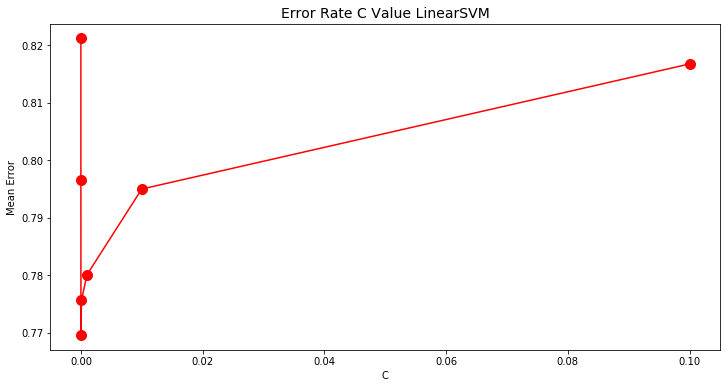

In [132]:
# Plot error Linear SVM
plt.figure(figsize=(12, 6))  
plt.plot(parameters_svm[2:-6], error_svm[2:-6], color='red', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Error Rate C Value LinearSVM', fontsize=14)  
plt.xlabel('C')  
plt.ylabel('Mean Error') 

plt.show()

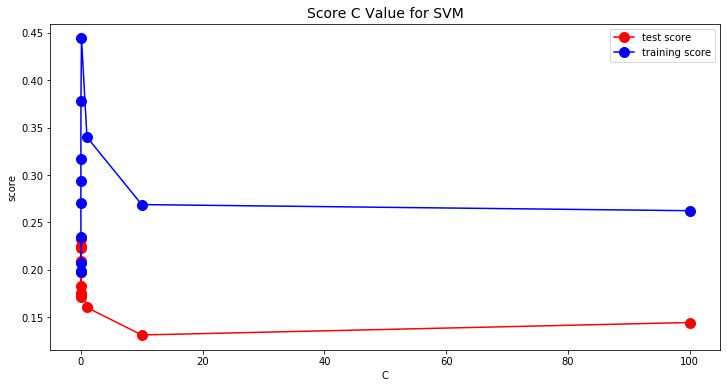

In [109]:
# Plot score results Linear SVM
plt.figure(figsize=(12, 6))  

plt.plot(parameters_svm[:-3], all_scores[:-3], color='red', marker='o',  markerfacecolor='red', markersize=10, label = 'test score')

plt.plot(parameters_svm[:-3], all_scores_train[:-3], color='blue', marker='o',  markerfacecolor='blue', markersize=10, label = 'training score')

plt.title('Score C Value for SVM', fontsize=14)  
plt.xlabel('C')  
plt.ylabel('score') 
plt.legend()
plt.show()

In [ ]:
# manual grid search cv for logreg
all_scores_train_logreg = []
all_scores_logreg = []
best_score_logreg = 0
error_logreg = []
parameters_logreg = [0.0000000001, 0.00000001,0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for C in parameters_logreg:
    # for each combination of parameters
    # train an SVC
    logreg = LogisticRegression(C=C)
    # perform cross-validation
    scores = cross_val_score(logreg, X_train_gray_normalized, y_train, cv=3)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    logreg.fit(X_train_gray_normalized, y_train)
    all_scores_logreg.append(score)
    all_scores_train_logreg.append(logreg.score(X_train_gray_normalized, y_train))
    
    pred_i = logreg.predict(X_test_gray_normalized)
    error_logreg.append(np.mean(pred_i != y_test))
   
    # if we got a better score, store the score and parameters
    if score > best_score_logreg:
        best_score_logreg = score
        best_parameters_logreg = {'C': C}  
# rebuild a model on the combined training and validation set
logreg = LogisticRegression(**best_parameters_logreg)
logreg.fit(X_train_gray_normalized, y_train)



In [234]:
train_score = all_scores_train_logreg[6]
print("The test score of logistic regression after regularization is {}".format(logreg.score(X_test_gray_normalized, y_test)))
print("The train score is {}".format(train_score))
print("The best C parameter is {}".format(best_parameters_logreg['C']))

The test score of logistic regression after regularization is 0.22553362867498994
The train score is 0.2930432446951383
The best C parameter is 0.001


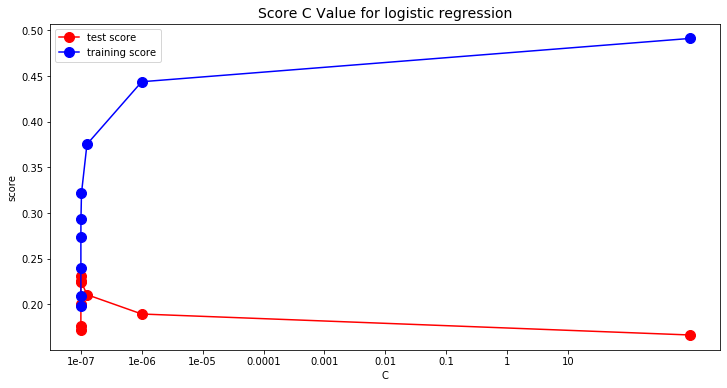

In [129]:
# Plot score results Logistic regression
plt.figure(figsize=(12, 6))  
plt.plot(parameters_logreg[2:-4], all_scores_logreg[2:-4], color='red', marker='o',  
         markerfacecolor='red', markersize=10, label = 'test score')
plt.plot(parameters_logreg[2:-4], all_scores_train_logreg[2:-4], color='blue', marker='o',  
         markerfacecolor='blue', markersize=10, label = 'training score')
x = list(range(len(parameters_logreg[2:-4])))
plt.xticks(x, parameters_logreg[2:-4])

plt.title('Score C Value for logistic regression', fontsize=14)  
plt.xlabel('C')  
plt.ylabel('score') 
plt.legend()
plt.show()

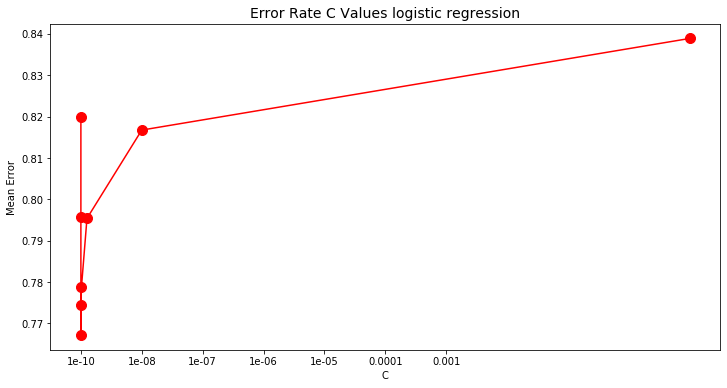

In [122]:
# Plot error rate Logistic Regression
xi = list(range(len(parameters_logreg[3:-5])))
plt.figure(figsize=(12, 6))  
plt.plot(parameters_logreg[3:-4], error_logreg[3:-4], color='red', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Error Rate C Values logistic regression', fontsize=14)  
plt.xlabel('C')  
plt.ylabel('Mean Error') 
plt.xticks(xi, parameters_logreg)
plt.show()

In [227]:
# manual grid search cv for knn
all_scores_train_knn = []
all_scores_knn = []
best_score_knn = 0

# plotting error for knn with different K
error_knn = []

for K in [i for i  in range(20,40)]:
    # for each combination of parameters
    # train an SVC
    knn = KNeighborsClassifier(n_neighbors=K)
    # perform cross-validation
    scores = cross_val_score(knn, X_train_gray_normalized, y_train, cv=3)
    # compute mean cross-validation accuracy
    score_knn = np.mean(scores)
    knn.fit(X_train_gray_normalized, y_train)
    #This 2 variables are used the for plotting training and test scores
    all_scores_knn.append(score_knn)
    all_scores_train_knn.append(knn.score(X_train_gray_normalized, y_train))
    
    #The next two lines of code store the number of misclassification for each hyperparameter
    pred_i = knn.predict(X_test_gray_normalized)
    error_knn.append(np.mean(pred_i != y_test))
    
    # if we got a better score in the cv of the current hyperparameter, store the score and parameters
    if score_knn > best_score_knn:
        best_score_knn = score
        best_parameters_knn = {'n_neighbors': K}  
# rebuild a model on the combined training and validation set
knn = KNeighborsClassifier(**best_parameters_knn)
knn.fit(X_train_gray_normalized, y_train)
print("The test score of knn after regularization is {}".format(knn.score(X_test_gray_normalized, y_test)))
print("The best K parameter is {}".format(best_parameters_knn['n_neighbors']))



The test score of knn after regularization is 0.5440998791784132
The best K parameter is 19


In [229]:
#store partial results cv
train_scores_knn = copy.deepcopy(all_scores_train_knn)
test_score_knn = copy.deepcopy(all_scores_knn)

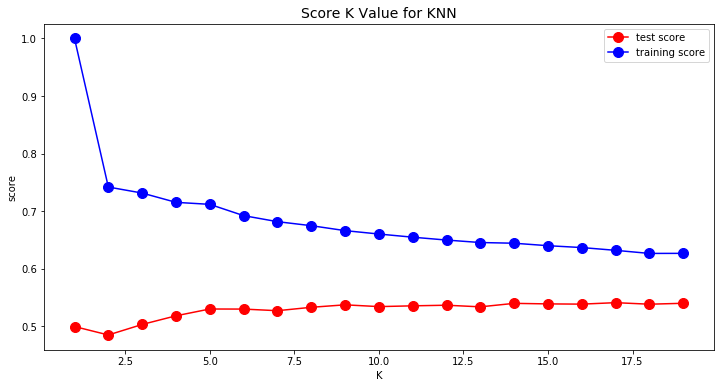

In [228]:

# Plot score results for KNN
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), all_scores_knn, color='red', marker='o',  
         markerfacecolor='red', markersize=10, label ="test score")
plt.plot(range(1, 20), all_scores_train_knn, color='blue', marker='o',  
         markerfacecolor='blue', markersize=10, label = "training score")

plt.title('Score K Value for KNN', fontsize=14)  
plt.xlabel('K')  
plt.legend()
plt.ylabel('score') 
plt.show()

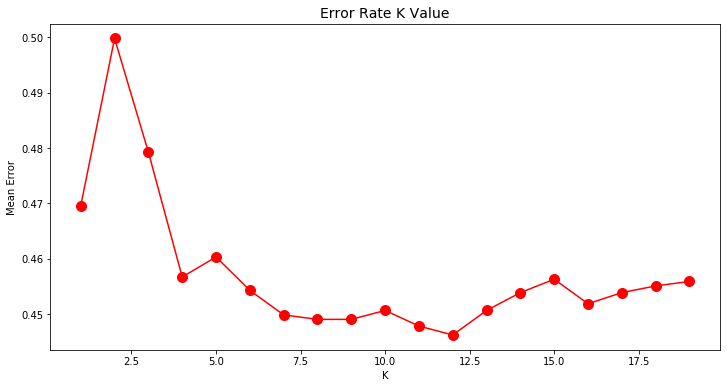

In [230]:
# Plot error rate KNN
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error_knn, color='red', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value', fontsize=14)  
plt.xlabel('K')  
plt.ylabel('Mean Error') 
plt.show()

All the models present the same behaviour: when the hyperparameter has a small value the training error is low and the test error is high, whereas when the hyperparameters have high values both training and test score are low. 
In the first case, we have overfitting because the model is too strict to the data used for fitting and the resulting change drastically when the dataset change, as demonstrated by the results in the test set. In the second case, there is underfitting: the model is too biased and cannot predict either training and test data. Between these two extremes lay the optimal value that allows to generalize the model trained in the data we have to new data. 
The linear models, SVM and logistic regression, do not generalize to new data. They seem to be too simple for modelling this dataset and they might have a high bias. 
KNN has also a high level of bias but it performs better than the linear models. The solution to this can be to try with a different model that is closer to the function that generates the data.

## 5. Interpreting misclassifications (10 points) {-}
- Chances are that your best model is not 100% accurate. Plot a few of the misclassified examples and their predicted and correct labels. Discuss. Are these indeed 'hard' examples that are easy to get wrong?
- Plot the confusion matrix. Which digits are often confused with each other? Which digits are easier/harder to classify? Discuss.

In [176]:
y_missclassifications = []
missclassifications = np.zeros((50,1024), dtype=float)
for i in range (len(X_test_gray_normalized[:50])):
    pred_i = knn.predict(X_test_gray_normalized[i].reshape(1, -1))
    if pred_i != y_test[i]:
        missclassifications[i]=X_test_gray_normalized[i]
        y_missclassifications.append(pred_i)

In [177]:
missclassifications = missclassifications[~np.all(missclassifications == 0, axis=1)]

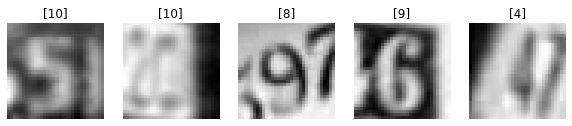

In [180]:
plot_images(missclassifications[0:5], y_missclassifications[0:5],grayscale = True);

In [181]:
y_missclassifications[0:5]

[array([9], dtype=int64),
 array([9], dtype=int64),
 array([7], dtype=int64),
 array([8], dtype=int64),
 array([3], dtype=int64)]

As we plot the misclassified images and their predictions we notice 3 things. 
First, the images that are mispredicted have a low or very low definition. 
Second, some images contain more than one number, but they are labelled only with one number. So, in the example with 3 numbers, the same image is labelled three times with different labels and whenever the algorithm predict one of these numbers correctly, it makes a mistake in the same image with the labels of the other numbers. 
Finally, some image has a bad definition and the shapes of the number they represent are similar to the shape of some other number- For example, the six we plotted is predicted as an eight, because the image has low definition and 6 and 8 have some similarity in their shapes.


In [68]:
y_pred = knn.predict(X_test_gray_normalized)

print(sklearn.metrics.confusion_matrix(y_test,y_pred))
print(sklearn.metrics.accuracy_score(y_test,y_pred))


[[423   7   9   9   2   3  11   2   1   7]
 [106 205  13   6   6   2  17   3   6   4]
 [ 99  26 123   8  13   1   6   2   4   3]
 [ 92   4   2 142   3   2   2   1   2   0]
 [ 58   4  33  11  93   8   1  16   3   5]
 [ 41   5   6  26  14  70   1  19   1  10]
 [ 63  24   6   3   2   1  85   2   2   2]
 [ 32  13   7  13   4  18   2  72   2   5]
 [ 44  14  10   9   4   3   9   8  46   9]
 [ 21  12   5  13   5   5   4   3   5  94]]
0.544905356423681


In [134]:
#report KNN
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           1       0.43      0.89      0.58       474
           2       0.65      0.56      0.60       368
           3       0.57      0.43      0.49       285
           4       0.59      0.57      0.58       250
           5       0.64      0.40      0.49       232
           6       0.62      0.36      0.46       193
           7       0.62      0.45      0.52       190
           8       0.56      0.43      0.49       168
           9       0.64      0.29      0.40       156
          10       0.68      0.56      0.61       167

    accuracy                           0.54      2483
   macro avg       0.60      0.49      0.52      2483
weighted avg       0.58      0.54      0.54      2483



### Discussion

Watching the confusion matrix and the classification report, it seems that the most difficult digits to predict are 1 and 2. One and two are also the digits that have more instances in the dataset. We see in the confusion matrix that there are many misclassifications in digit one but also many correct predictions, and overall the precision and recall are 0.43 and 0.89 respectively.
We notice in the confusion matrix that often the 6 is confused for an 8, 2 for a 7,1 for a 2, 5 for an 8, 6 for a 0, 6 for a 5, 5 for a 3.

## 6. Interpreting models (15 points) {-}
- Try to understand what the linear models have learned by looking at their model parameters. Are there features (pixels) that are more important than others? What does that tell you?
- Visualize the model parameters of the best (tuned) models as a 32x32 matrix, for each class individually. This means training 10 models in a one-vs-all fashion. Does this help you understand what the model is paying attention to?
- Do the same for an underfitted and an overfitted version of logistic regression. What changes? Is the model paying attention to different parts of the image now?

In [196]:
# Here we gather the set of parameters for each class in a 32*32 matrix for plotting them in heatmaps.

list_of_parameters_table = []
for i in range(10):
    list_of_parameters_table.append(logreg.coef_[i].reshape(32,32))



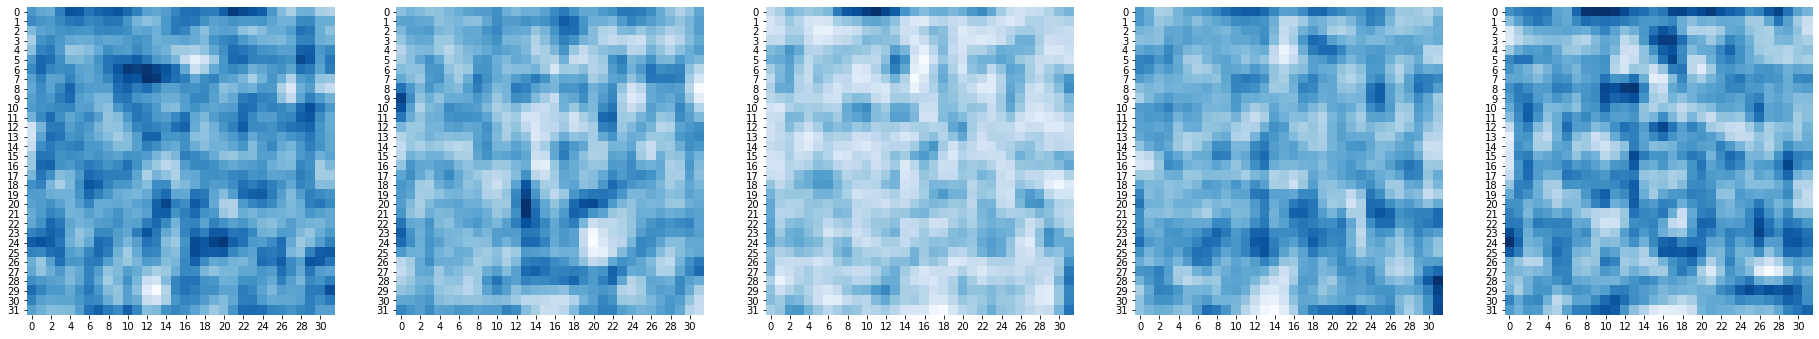

In [197]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (32,32));
sb.heatmap(list_of_parameters_table[0], square = True, cmap = 'Blues_r', ax = axes[0], cbar = False);
sb.heatmap(list_of_parameters_table[1], square = True, cmap = 'Blues_r', ax = axes[1], cbar = False);
sb.heatmap(list_of_parameters_table[2], square = True, cmap = 'Blues_r', ax = axes[2], cbar = False);
sb.heatmap(list_of_parameters_table[3], square = True, cmap = 'Blues_r', ax = axes[3], cbar = False);
sb.heatmap(list_of_parameters_table[4], square = True, cmap = 'Blues_r', ax = axes[4], cbar = False);


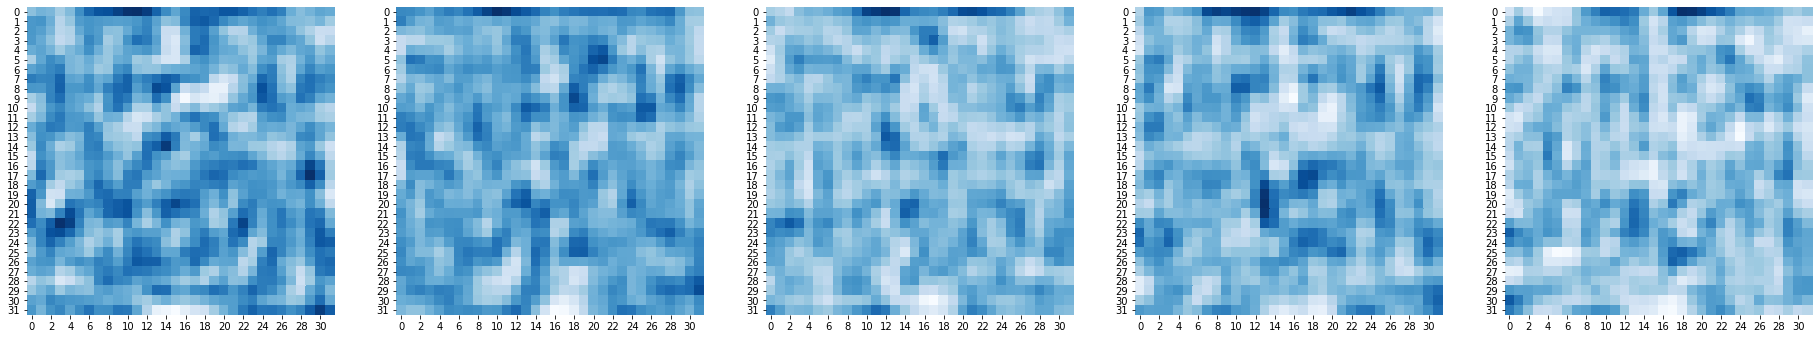

In [198]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (32,32));
sb.heatmap(list_of_parameters_table[5], square = True, cmap = 'Blues_r', ax = axes[0], cbar = False);
sb.heatmap(list_of_parameters_table[6], square = True, cmap = 'Blues_r', ax = axes[1], cbar = False);
sb.heatmap(list_of_parameters_table[7], square = True, cmap = 'Blues_r', ax = axes[2], cbar = False);
sb.heatmap(list_of_parameters_table[8], square = True, cmap = 'Blues_r', ax = axes[3], cbar = False);
sb.heatmap(list_of_parameters_table[9], square = True, cmap = 'Blues_r', ax = axes[4], cbar = False);

### Discussion 
It is difficult to model the data with a linear model because the pixels do not contain always the same information in the images of the same class. For example, in all the images with a 5, pixel35 sometimes contains the border of the shape of the five but some other times it may contain something else because the number can be bigger or with a different shape or definition or position in the image. Thus, it doesn't make sense to make a linear combination of the pixels because every time they might mean something different, while the weight of a linear model always reflects the impact of the same information in the output. This is confirmed by looking at the heatmaps for the parameters of each class. We would expect to see the more important pixels to form a rough shape of the number they are going to predict, but they are giving importance to part of the images that are distant and disconnected.
In addition, the Linear model's performance, are also affected by collinearity. We imagine that the pixels of an image are usually correlated since if on the pixel is green, for example, the next pixel is likely to be green as well. 

**Technical remarks:**

- The track says "This means training 10 models in a one-vs-all fashion". However, we found in the documentation of logistic regression that by default a binary problem is fit for each label. We simply plot the set of parameters for each class then.


In [217]:
logreg_overfit = LogisticRegression().fit(X_train_gray_normalized[:1000], y_train[:1000]);

In [219]:
print(logreg_overfit.score(X_train_gray_normalized[:1000], y_train[:1000]))
print(logreg_overfit.score(X_test_gray_normalized, y_test))

0.891
0.1482078131292791


In [220]:
list_of_parameters_overfit_table = []
for i in range(10):
    list_of_parameters_overfit_table.append(logreg_overfit.coef_[i].reshape(32,32))

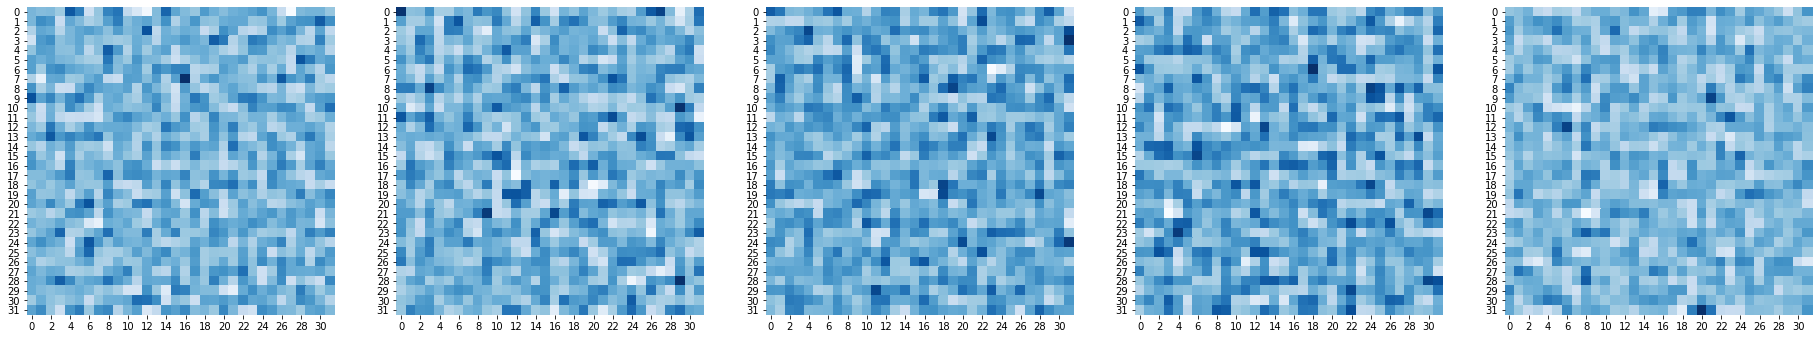

In [222]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (32,32));
sb.heatmap(list_of_parameters_overfit_table[0], square = True, cmap = 'Blues_r', ax = axes[0], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[1], square = True, cmap = 'Blues_r', ax = axes[1], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[2], square = True, cmap = 'Blues_r', ax = axes[2], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[3], square = True, cmap = 'Blues_r', ax = axes[3], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[4], square = True, cmap = 'Blues_r', ax = axes[4], cbar = False);


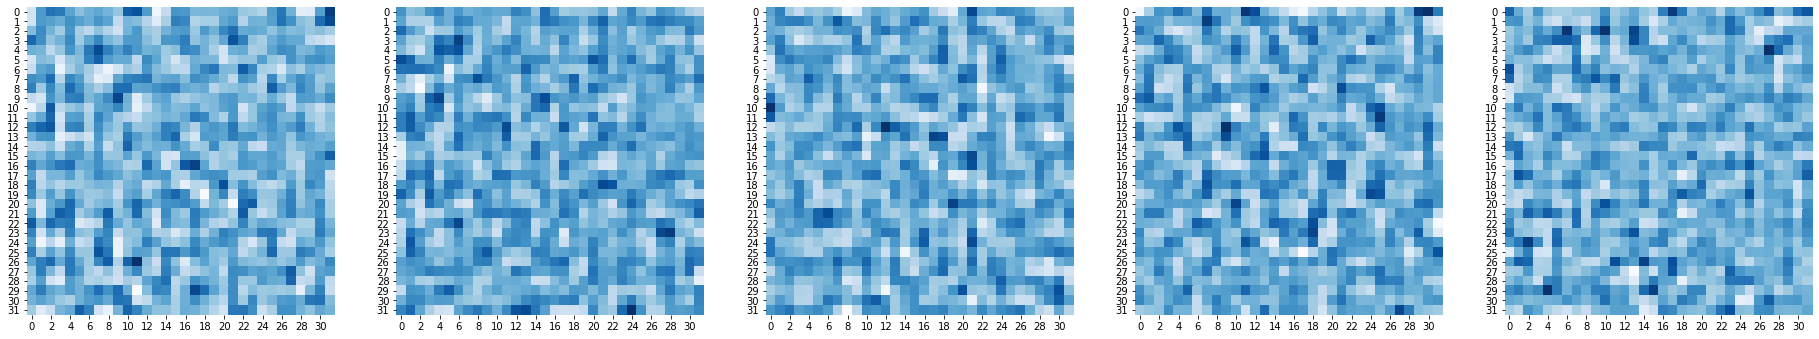

In [223]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (32,32));
sb.heatmap(list_of_parameters_overfit_table[5], square = True, cmap = 'Blues_r', ax = axes[0], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[6], square = True, cmap = 'Blues_r', ax = axes[1], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[7], square = True, cmap = 'Blues_r', ax = axes[2], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[8], square = True, cmap = 'Blues_r', ax = axes[3], cbar = False);
sb.heatmap(list_of_parameters_overfit_table[9], square = True, cmap = 'Blues_r', ax = axes[4], cbar = False);

## Discussion
The distribution of the importance of the parameters is even more meaningless. They are more disconnected and they seem completely random, probably highlighting some meaningless feature of the training data that are useful to distinguish the images within the dataset, but that lost significance with a new example.

Good luck!